# Data Warehousing and Data Mining

## Labs

### Prepared by Gilroy Gordon

#### Contact Information

SCIT ext. 3643

ggordonutech@gmail.com

gilroy.gordon@utech.edu.jm

### Week 6 - Clustering in Python


Additional Reference Resources:

http://scikit-learn.org/stable/modules/clustering.html

Objectives
----
---
     > Data Preprocessing
          > Missing Values (Na and nulls)
     > Data Mining
          > Clustering (Kmeans)
     > Visualizations
          > Elbow method (Within Cluster Sum of Squares)
     > Discussion on how to proceed
    

## Aim: Am I able to segment groups based on 

## Import required libraries and acquire data

In [52]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [53]:
data_path = './data/credit-card-data.csv' # Path to data file
data = pd.read_csv(data_path) 
data.head(15)

,cust_id,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000,1164.770591,100.302262,0.000000,12


In [54]:
# What columns are in the data set ? Do they have spaces that I should consider
data.columns

Index(['cust_id', 'balance', 'balance_frequency', 'purchases',
       'oneoff_purchases', 'installments_purchases', 'cash_advance',
       'purchases_frequency', 'oneoff_purchases_frequency',
       'purchases_installments_frequency', 'cash_advance_frequency',
       'cash_advance_trx', 'purchases_trx', 'credit_limit', 'payments',
       'minimum_payments', 'prc_full_payment', 'tenure'],
      dtype='object')

In [55]:
data.describe()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


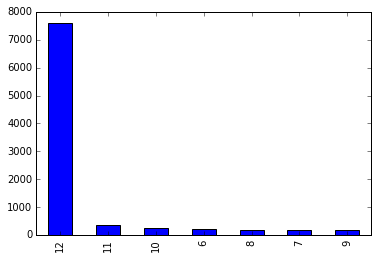

In [56]:
data['tenure'].value_counts().plot(kind='bar')

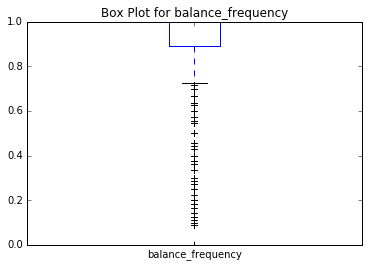

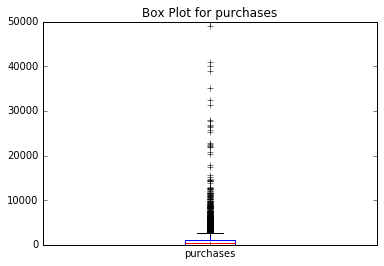

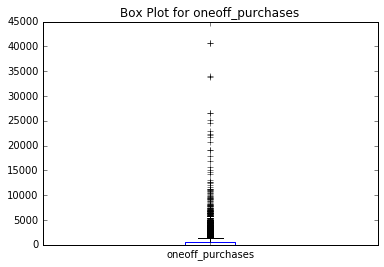

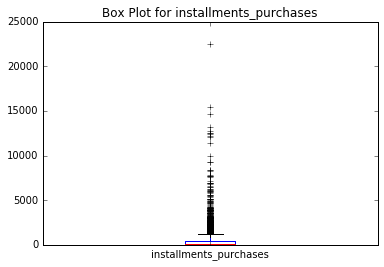

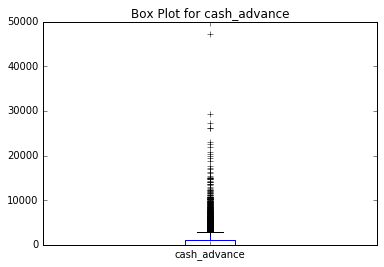

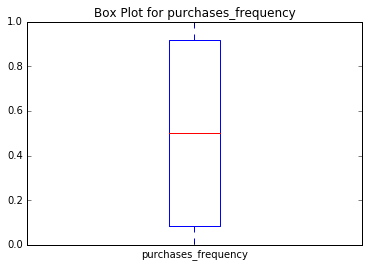

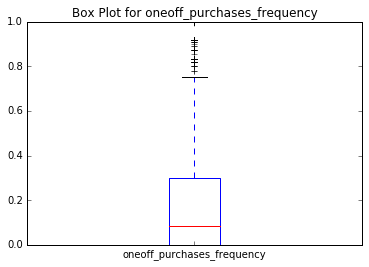

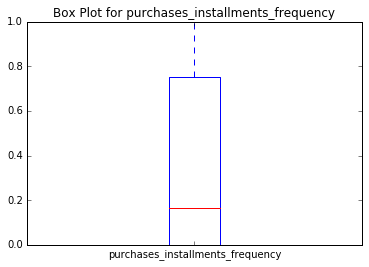

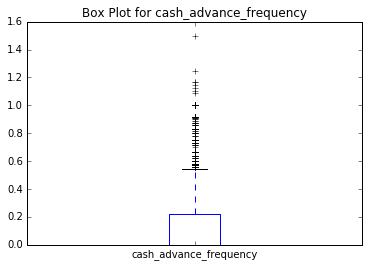

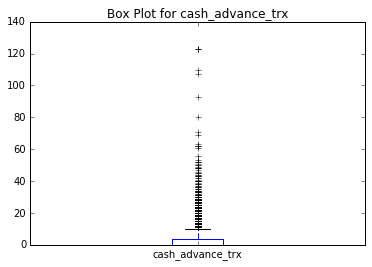

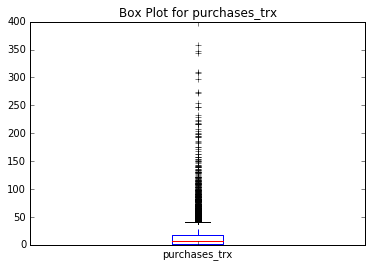

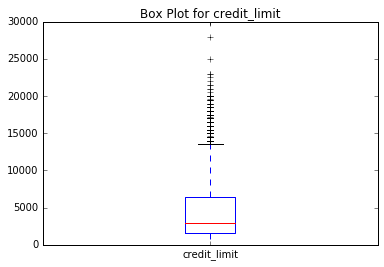

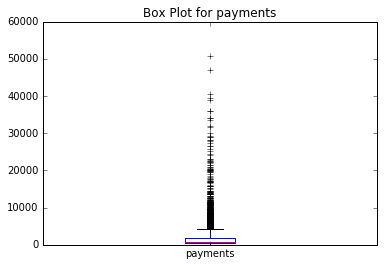

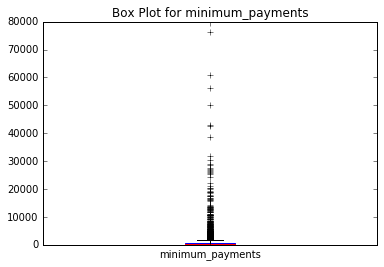

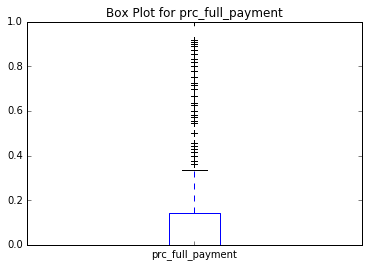

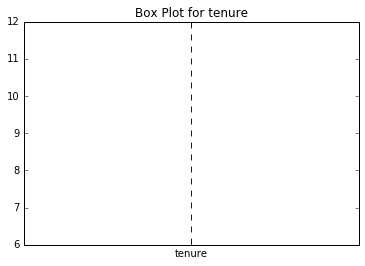

In [57]:
# Let's view the distribution of the data, where is it possible to find groups?
# We are using boxplots of all the columns except the first (cust_id which is a string)
for col in data.columns[2:]:
    data[col].plot(kind='box')
    plt.title('Box Plot for '+col)
    plt.show()


## Aim: Can we identify groups based on purchases and payments?

If that is the case, we could offer different payment plans based on different purchases.



In [58]:
cluster_data = data[['purchases','payments']]
cluster_data.head()

,purchases,payments
0,95.40,201.802084
1,0.00,4103.032597
2,773.17,622.066742
3,1499.00,0.000000
4,16.00,678.334763


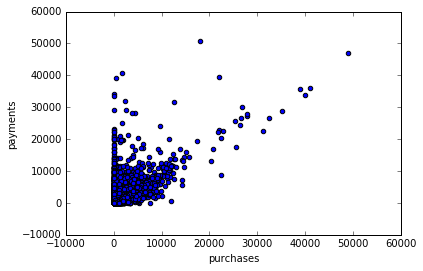

In [59]:
cluster_data.plot(kind='scatter',x='purchases',y='payments')

In [60]:
# Is there any missing data
missing_data_results = cluster_data.isnull().sum()
print(missing_data_results)

# perform imputation with median values
# not require since none missing
#cluster_data = cluster_data.fillna( data.median() )

purchases    0
payments     0
dtype: int64


In [61]:
#retrieve just the values for all columns except customer id
data_values = cluster_data.iloc[ :, :].values
data_values

array([[  95.4     ,  201.802084],
       [   0.      , 4103.032597],
       [ 773.17    ,  622.066742],
       ...,
       [ 144.4     ,   81.270775],
       [   0.      ,   52.549959],
       [1093.25    ,   63.165404]])

In [62]:
#import KMeans algorithm
from sklearn.cluster import KMeans

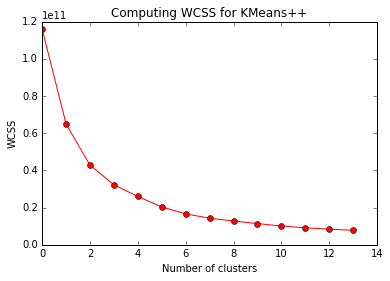

In [63]:
# Use the Elbow method to find a good number of clusters using WCSS (within-cluster sums of squares)
wcss = []
for i in range( 1, 15 ):
    kmeans = KMeans(n_clusters=i, init="k-means++", n_init=10, max_iter=300) 
    kmeans.fit_predict( data_values )
    wcss.append( kmeans.inertia_ )
    
plt.plot( wcss, 'ro-', label="WCSS")
plt.title("Computing WCSS for KMeans++")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

We're seeing an elbow at approx 5, so let's try 5 groups

In [64]:
kmeans = KMeans(n_clusters=5, init="k-means++", n_init=10, max_iter=300) 
cluster_data["cluster"] = kmeans.fit_predict( data_values )
cluster_data

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,purchases,payments,cluster
0,95.40,201.802084,0
1,0.00,4103.032597,4
2,773.17,622.066742,0
3,1499.00,0.000000,0
4,16.00,678.334763,0
5,1333.28,1400.057770,0
6,7091.01,6354.314328,3
7,436.20,679.065082,0
8,861.49,688.278568,0
9,1281.60,1164.770591,0


In [65]:
cluster_data['cluster'].value_counts()

0    7101
4    1506
3     225
1      95
2      23
Name: cluster, dtype: int64

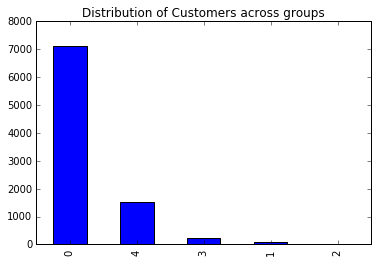

In [66]:
cluster_data['cluster'].value_counts().plot(kind='bar',title='Distribution of Customers across groups')

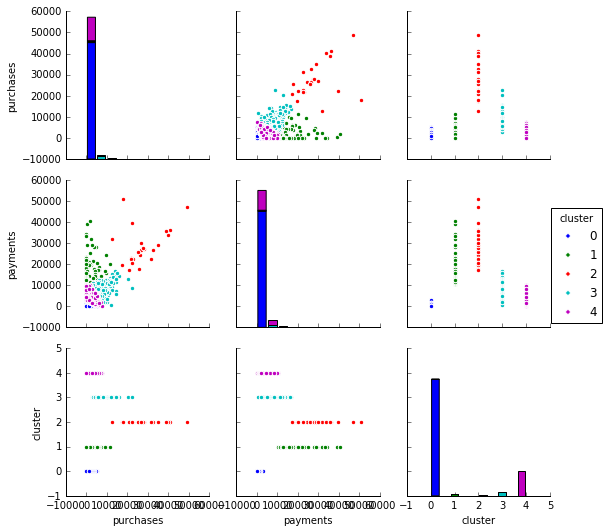

In [67]:
sns.pairplot( cluster_data, hue="cluster")

 Looks nice, but what are we really seeing?
 Let's attempt to describe the groups

In [68]:
grouped_cluster_data = cluster_data.groupby('cluster')
grouped_cluster_data

In [69]:
grouped_cluster_data.describe()

purchases      payments  cluster
cluster                                           
0       count   7101.000000   7101.000000     7101
        mean     490.956174    791.841069        0
        std      614.496323    613.360202        0
        min        0.000000      0.000000        0
        25%        9.900000    311.599140        0
        50%      268.920000    617.883193        0
        75%      715.810000   1164.081703        0
        max     5359.020000   2933.325551        0
1       count     95.000000     95.000000       95
        mean    1511.432632  17020.850174        1
        std     2500.194731   6511.217645        0
        min        0.000000  10428.376110        1
        25%        0.000000  11863.586565        1
        50%      130.240000  15043.665080        1
        75%     1943.560000  20096.540445        1
        max    11500.940000  40627.595240        1
2       count     23.000000     23.000000       23
        mean   27574.397391  28574.474955        2
        std     8650.801231   8731.018481        0
        min    12551.950000  17005.409690        2
        25%    22055.850000  22550.435810        2
        50%    26402.390000  26652.344320        2
        75%    31919.565000  32846.573435        2
        max    49039.570000  50721.483360        2
3       count    225.000000    225.000000      225
        mean    7841.268444   7504.859576        3
        std     2990.571070   2963.414587        0
        min     2823.800000    508.797444        3
        25%     5787.660000   5589.952268        3
        50%     7244.980000   7109.795209        3
        75%     9321.130000   9290.702248        3
        max    22500.000000  16826.424430        3
4       count   1506.000000   1506.000000     1506
        mean    1959.044376   3934.918291        4
        std     1612.348685   1793.904174        0
        min        0.000000      0.000000        4
        25%      348.500000   2662.342657        4
        50%     1940.400000   3502.654096        4
        75%     3095.712500   4644.258312        4
        max     7597.090000  10339.938450        4

cluster
0    Axes(0.125,0.125;0.775x0.775)
1    Axes(0.125,0.125;0.775x0.775)
2    Axes(0.125,0.125;0.775x0.775)
3    Axes(0.125,0.125;0.775x0.775)
4    Axes(0.125,0.125;0.775x0.775)
dtype: object

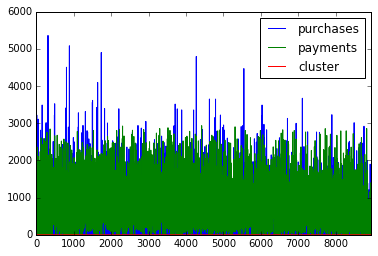

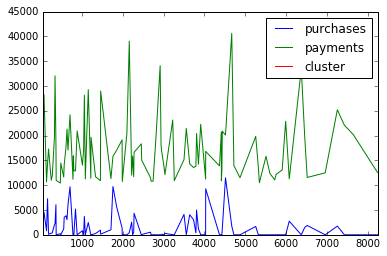

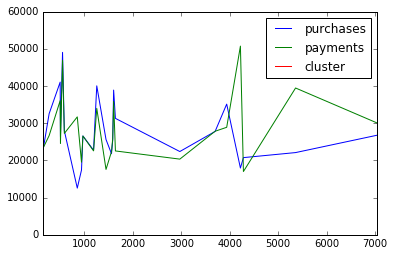

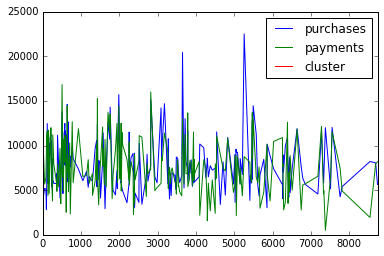

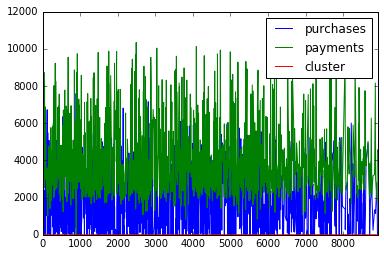

In [70]:
grouped_cluster_data.plot(subplots=True,)

## In - class assignment

1. Provide three(3) plots of the data to assist in describing the initial data set
2. Plot the differences between the groups above using at least two (2) charts.
3. Repeat the clustering activity on different columns in an attempt to provide additional marketing insight. If the results are not insightful state why


In [77]:
kmeans.predict(pd.DataFrame({'purchases':[300],'payments':[40000]}))

array([2], dtype=int32)

In [72]:
help(kmeans.predict)

Help on method predict in module sklearn.cluster.k_means_:

predict(X) method of sklearn.cluster.k_means_.KMeans instance
    Predict the closest cluster each sample in X belongs to.
    
    In the vector quantization literature, `cluster_centers_` is called
    the code book and each value returned by `predict` is the index of
    the closest code in the code book.
    
    Parameters
    ----------
    X : {array-like, sparse matrix}, shape = [n_samples, n_features]
        New data to predict.
    
    Returns
    -------
    labels : array, shape [n_samples,]
        Index of the cluster each sample belongs to.



In [73]:
kmeans.predict([[3,2]])

array([0], dtype=int32)

In [74]:
kmeans.algorithm

'auto'

In [75]:
kmeans.cluster_centers_

array([[  491.02532254,   791.53945193],
       [ 1511.43263158, 17020.85017389],
       [27574.3973913 , 28574.47495522],
       [ 7841.26844444,  7504.8595756 ],
       [ 1957.74441274,  3934.25366418]])

In [76]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)